In [3]:
import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

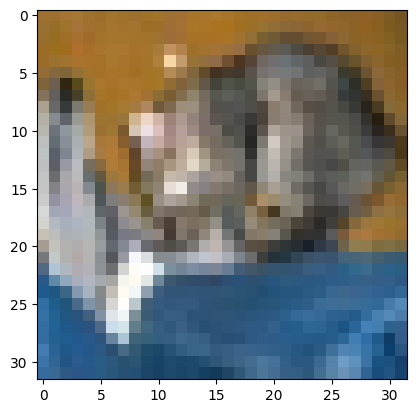

In [5]:
plt.imshow(x_test[0])

In [6]:
y_test = y_test.flatten()
y_train = y_train.flatten()
print(f"y_test shape: {y_test.shape} \n y_train shape: {y_train.shape}")

y_test shape: (10000,) 
 y_train shape: (50000,)


In [7]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
def plot_sample(x_train, y_train, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y_train[index]])

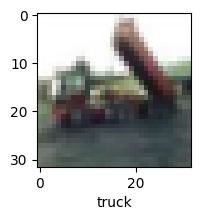

In [9]:
plot_sample(x_train, y_train, 2)

In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
ann = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)

/home/anato_eini/Codes/CS346/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1740534844.544979   75036 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2611 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Epoch 1/5


I0000 00:00:1740534846.241704   76455 service.cc:148] XLA service 0x7694c40178e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740534846.241724   76455 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-02-26 09:54:06.249205: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740534846.281273   76455 cuda_dnn.cc:529] Loaded cuDNN version 90300


  40/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1369 - loss: 2.3050

I0000 00:00:1740534847.003994   76455 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3082 - loss: 1.9234
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4270 - loss: 1.6333
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4509 - loss: 1.5530
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4773 - loss: 1.4831
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4931 - loss: 1.4362


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(f"Classification Report: \n {classification_report(y_test, y_pred_classes)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.46      0.52      1000
           1       0.53      0.65      0.58      1000
           2       0.52      0.13      0.21      1000
           3       0.31      0.40      0.35      1000
           4       0.57      0.25      0.35      1000
           5       0.46      0.28      0.35      1000
           6       0.51      0.53      0.52      1000
           7       0.52      0.50      0.51      1000
           8       0.64      0.57      0.60      1000
           9       0.31      0.76      0.44      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.44     10000
weighted avg       0.49      0.45      0.44     10000



In [13]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=30)

/home/anato_eini/Codes/CS346/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


2025-02-26 09:54:44.395540: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-26 09:54:44.471807: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,13,13]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,15,15]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=

1552/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3869 - loss: 1.6885

2025-02-26 09:54:49.868884: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-26 09:54:49.927708: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,64,13,13]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,15,15]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3876 - loss: 1.6867
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6014 - loss: 1.1390
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6565 - loss: 0.9846
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6909 - loss: 0.8867
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7190 - loss: 0.8086
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7370 - loss: 0.7547
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7596 - loss: 0.6910
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7733 - loss: 0.6525
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7897 - loss: 0.6046
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8054 - loss: 0.5607
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8234 - loss: 0.5133
Epoch 12/30
1563/1563 ━━━━━━━━━━━━━━━━━━━

In [14]:
cnn.evaluate(x_test, y_test)


2025-02-26 09:56:58.143850: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-26 09:56:58.204815: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,13,13]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,15,15]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=

286/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - loss: 2.0833

2025-02-26 09:56:59.021741: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-26 09:56:59.079814: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,64,13,13]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,15,15]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6851 - loss: 2.0875


[2.142993688583374, 0.6825000047683716]

In [15]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(f"Classification Report: \n {classification_report(y_test, y_pred_classes)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.78      0.72      1000
           1       0.77      0.82      0.79      1000
           2       0.53      0.61      0.57      1000
           3       0.52      0.48      0.50      1000
           4       0.68      0.56      0.62      1000
           5       0.59      0.57      0.58      1000
           6       0.74      0.75      0.75      1000
           7       0.74      0.73      0.73      1000
           8       0.84      0.77      0.80      1000
           9       0.75      0.76      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



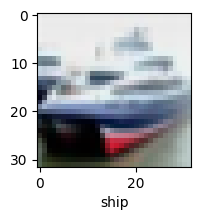

In [16]:
plot_sample(x_test, y_test, 1)